# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [8]:
data = pd.read_csv('weight-height.csv')

male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height Mean: ', male_df['Height'].mean())
print('Male Height SD: ', male_df['Height'].std())
print('Male Weight Mean: ', male_df['Weight'].mean())
print('Male Weight SD: ', male_df['Weight'].std())
print('Female Height Mean: ', female_df['Height'].mean())
print('Female Height SD: ', female_df['Height'].std())
print('Female Weight Mean: ', female_df['Weight'].mean())
print('Female Weight SD: ', female_df['Weight'].std())



# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height Mean:  69.02634590621737
Male Height SD:  2.8633622286606517
Male Weight Mean:  187.0206206581929
Male Weight SD:  19.781154516763813
Female Height Mean:  63.708773603424916
Female Height SD:  2.696284015765056
Female Weight Mean:  135.8600930074687
Female Weight SD:  19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

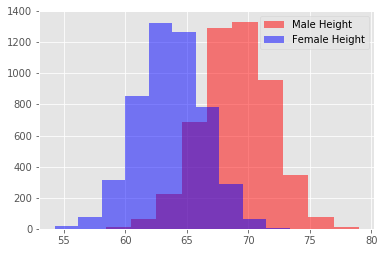

In [9]:
# Your code here
plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male Height', color='red')
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female Height', color='blue')
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?

# Highest density of females falls at a lower height than for men.  The shape of the distributions is broadly similar.


## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [18]:
def density(x):
    n, bins = np.histogram(x, bins=10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
 
    return pdfx, pdfy


    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy



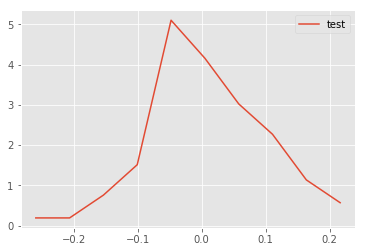

In [19]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

In [32]:
xm, ym = density(male_df['Height'])
ym

array([0.00097126, 0.00621606, 0.02146482, 0.06672547, 0.12529236,
       0.12937165, 0.09285233, 0.03389693, 0.00767294, 0.00116551])

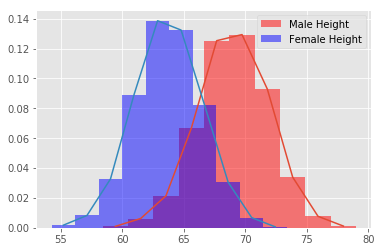

In [38]:
# You code here 

plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male Height', color='red', density=True);
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female Height', color='blue', density=True);
plt.legend()

xm,ym = density(male_df['Height'])
plt.plot(xm, ym)

xf,yf = density(female_df['Height'])
plt.plot(xf, yf)


plt.show()

## Repeat above exerice for male and female weights

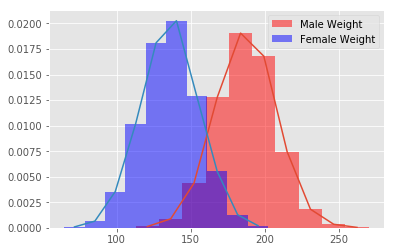

In [39]:
# Your code here 

plt.hist(male_df['Weight'], bins=10, alpha=0.5, label='Male Weight', color='red', density=True);
plt.hist(female_df['Weight'], bins=10, alpha=0.5, label='Female Weight', color='blue', density=True);
plt.legend()

xm,ym = density(male_df['Weight'])
plt.plot(xm, ym)

xf,yf = density(female_df['Weight'])
plt.plot(xf, yf)


plt.show()


## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# As expected, the distribution of male weights is higher than female

# What is the takeaway when comparing male and female heights and weights?

## Repeat Above experiments in seaborn and compare with your results

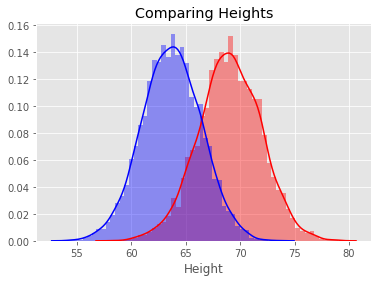

In [40]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df['Height'], hist=True, kde=True, color='red')
sns.distplot(female_df['Height'], hist=True, kde=True, color='blue')
plt.title('Comparing Heights')
plt.show()

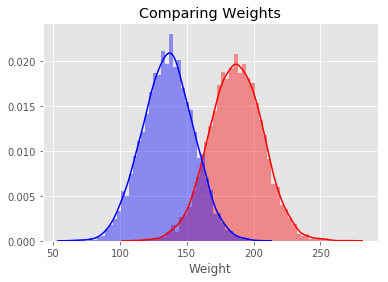

In [41]:
# Code for weights here
sns.distplot(male_df['Weight'], hist=True, kde=True, color='red')
sns.distplot(female_df['Weight'], hist=True, kde=True, color='blue')
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# More bins used in distplot, therefore more closely approximates the kde.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.